# Tarea 1A
***Autores:** Pablo Montes, Joaquín Pelle y Oscar Reula*
### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como (según corresponda): 
**apellido_nombre_tarea_1.ipynb** o **grupo_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**Antes de entregar, serciorese que todas las variables estén bien definidas, para ello interrumpa el kernel y corra todo desde cero.**

**El objetivo de las primeras tareas (A y B) es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

**1)** La ecuación diferencial

$$
\frac{dy}{dt} = \lambda y
$$

tiene como solución la función 
$$ y(t) = y_0e^{\lambda t}, $$
donde $y_0$ es una constante que depende del dato inicial, es el valor de $y(t)$ en $t=0$.

Buscamos una aproximación numérica utilizando el *método de Euler*,
$$y(t+\Delta t) \approx y(t) + \Delta t \dfrac{dy}{dt}(t) = y(t) + \Delta t \lambda y(t)$$
tomando $\lambda = 2$ y dato inicial $y(0) = 1$ en el intervalo de tiempo $[0,2]$.


**Implementación del método:**

Una forma simple de implementar el método de Euler sería la siguiente
```julia
#Datos iniciales
λ = 2
y0 = 1
#Cantidad de pasos temporales y dt
Tfin = 2.0
N = 201
dt = Tfin/(N-1)

#Vectores donde guardamos la solución
tiempos = zeros(N)
y = zeros(N)
#Asignamos el dato inicial
y[1] = y0
#Evolución temporal usando el método de Euler
for i in 2:N
    tiempos[i] = dt*(i-1)      #Actualizamos el valor de t
    y[i] = y[i-1] + dt*λ*y[i-1]  #Hacemos un paso de Euler
end
```


Lo que haremos es partir este procedimiento en algunas funciones pequeñas, de manera que cuando en el futuro queramos cambiar de método numérico, o resolver otra ecuación diferencial, esto se pueda hacer de manera directa. Las funciones que usaremos están en el archivo ``myODEfunctions.jl``

In [ ]:
include("myODEfunctions.jl")

Nuestra implementación del método de Euler entonces será la siguiente: (esto será similar a la librería `DifferentialEquations.jl` que usaremos más adelante)

In [3]:
#1) Datos del problema: 
#Definimos el término derecho de la ODE
CrecimientoExponencial(y, t, λ) = λ*(y)    
#Datos iniciales
y0 = 1.0
#Intervalo temporal
T = (0.0, 4.0)
#Parámetros del problema (dentro de una tupla)
λ = 2.
par = (λ)
#Guardamos los datos en la variable "prob"
prob = myODEproblem(CrecimientoExponencial, y0, T, par) 

(CrecimientoExponencial, 1.0, (0.0, 4.0), 2.0)

Elegimos una cantidad de pasos temporales apropiados y resolvemos:

In [4]:
#Cantidad de pasos temporales
N = 101
#Resolvemos el problema "prob" usando el método "EulerStep" 
#discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
dt = (T[2]-T[1])/(N-1)
t, y = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36  …  3.64, 3.68, 3.72, 3.7600000000000002, 3.8000000000000003, 3.84, 3.88, 3.92, 3.96, 4.0], [1.0; 1.08; … ; 2036.8159780937817; 2199.761256341284])

Una vez obtenida la solución la graficamos.

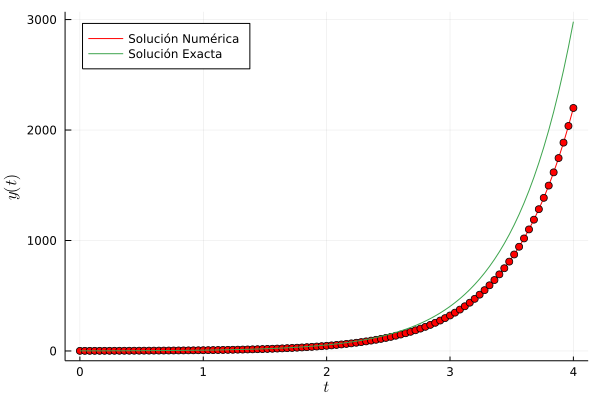

In [8]:
using Plots
gr()
plt = plot()
plot!(plt, t, y, color = :red, label = "Solución Numérica")
scatter!(plt, t, y, color = :red, label = "")
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

### Problema 1: ###

***1a)*** Juegue con distintos valores de `dt` (`N`) y datos iniciales. Vea que sucede a medida que aumenta o disminuye `dt`. 

In [9]:
N = 201
dt = (T[2]-T[1])/(N-1)
t2, y2 = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  3.8200000000000003, 3.84, 3.86, 3.88, 3.9, 3.92, 3.94, 3.96, 3.98, 4.0], [1.0; 1.04; … ; 2452.644029899748; 2550.749791095738])

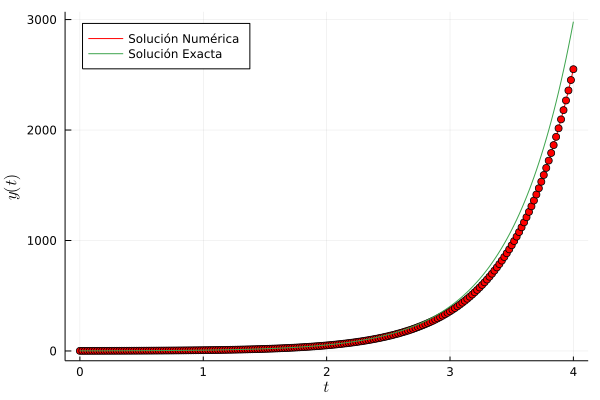

In [11]:
plt2 = plot()
plot!(plt2, t2, y2, color = :red, label = "Solución Numérica")
scatter!(plt2, t2, y2, color = :red, label = "")
plot!(plt2, t2, y0*exp.(λ*t2), label = "Solución Exacta")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt2, legend = :topleft)

***1b)*** ¿Cómo se comporta el sistema si $\lambda$ y/o $y_0$ son números complejos?. Pruebe con $\lambda$ imaginario. Grafique. 

*Pista 1: Un número complejo $c = a + bi$ se define en jula como como `c = a + bim`. Las funciones `real(c)` e `imag(c)` retornan `a` y `b` respectivamente.*

*Pista 2: Si toma $\lambda$ complejo, también debe tomar el dato inicial como número complejo, aunque sea real, por ejemplo $y_0 = 1.0 + 0.0im$*

***1c)*** Utilice varios N para calcular el factor $Q$ del método de Euler.

***1d)***
Usando $\lambda = 1, y_0 = 1$, implemente los métodos de Runge-Kutta de orden 2 y 4 creando dos funciones llamadas `RK2step` y `RK4step`, similares a `EulerStep`. Vuelva a graficar para distintos $N$ y calcule el factor $Q$ para estos métodos. Nota: para RK2 puede usar el que se llama *método de Heum* o el que se denomina *método de Euler Mejorado*, o ambos (con nombres distintos).

***Ayuda:** Primero defina las funciones en una celda y pruébelas hasta estar seguro que están funcionando correctamente. Sólo cuando esté seguro cópielas a el archivo  ``myODEfunctions.jl``. Es más eficiente y cómodo trabajar en el notebook!*

***1e)*** Repita el punto anterior para $\lambda = i$ y $y_0 = 1$. ¿Qué diferencia ve entre los métodos? 

### Problema 2: ###
**Estabilidad de la solución**

Considere la ecuación $$
\frac{dy}{dt} = y - y^2
$$

Esta ecuación tiene dos puntos estacionarios: $y(t) = 1$ e $y (t) = 0$. Evolucione numéricamente con `y0 = 0:0.1:2` (es decir, con datos iniciales $y_0 = 0, y_0 = -0.1,...,y_0 = 2$). Considere para esto el intervalo temporal $[0, 10]$. Grafique con distintos métodos y valores de N y trate de comprender el comportamiento de la solución.

*Opcional:* Para ver el comportamiento para $y_0$ negativo pruebe con `y0 = (0:-0.1:-0.5)` en el intervalo temporal [0,1].

### Problema 3: ###
**Sistemas de ecuaciones**

La ecuación diferencial ordinaria de segundo orden
$$
\dfrac{d^{2}u(t)}{dt^2} = -\alpha^{2} u(t), \quad \alpha > 0
$$

tiene como solución general $u = A\textrm{cos}(\alpha t) +  B\textrm{sen}(\alpha t)$.

Para resolverla numéricamente, podemos convertirla en un sistema de ecuaciones se ordinarias de primer orden definiendo $v = \dfrac{du}{dt}$.

$$
    \begin{array}{c}
    \dfrac{du}{dt} &= &  v \\
    \dfrac{dv}{dt} &= &-\alpha^{2} u
    \end{array}
$$

***3a)*** Considere $$\alpha = 1, \quad u(0) = 1,\quad  v(0) = 0.$$ 
Grafique y compare el desempéño de los distintos métodos con la solución exacta.


*Pista: defina `y0 = [u0, v0]`*

***3b)***

Resuelva ahora el sistema del péndulo físico: 

$$
\frac{d}{dt}\left(
    \begin{array}{c}
    y_1 \\
    y_2
    \end{array}
    \right)
    = 
    \left(
    \begin{array}{c}
    y_2 \\
    -sin(y_1)
    \end{array}
    \right)
$$

con con $y_0 = (0.1,0)$ en el intervalo $t=[0,10]$. 

Grafique las soluciones obtenidas. Use varios métodos y modifique el tamaño del paso temporal. Use otros datos iniciales. 

Vea que la función $E(y) = \frac{1}{2} y_2^2 + (1-cos(y_1))$ es constante a lo largo de la evolución (una *constante del movimiento*) y vea que sucede numericamente. 